In [ ]:
cd D:/DS7010/IEMOCAP_full_release/IEMOCAP_full_release

D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release


In [1]:
pwd

'/content'

In [ ]:
this is test written in colab

In [ ]:
import sys
print(sys.version)



3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]


In [ ]:
import pandas as pd


In [ ]:
data=pd.read_csv('iemocap_final.csv')
data

,_id,activation,valence,dominance,emotion,start_time,end_time,wav_file,session,sentences
0,625699ea1da7a5c1eaef6e63,2.5,2.5,2.5,neu,6.2901,8.2357,Ses01F_impro01_F000,1,Excuse me.
1,625699ea1da7a5c1eaef6e65,2.5,2.5,2.5,neu,10.0100,11.3925,Ses01F_impro01_F001,1,Yeah.
2,625699ea1da7a5c1eaef6e67,2.5,2.5,2.5,neu,14.8872,18.0175,Ses01F_impro01_F002,1,Is there a problem?
3,625699ea1da7a5c1eaef6e69,3.0,2.5,3.0,neu,19.2900,20.7875,Ses01F_impro01_F003,1,You did.
4,625699ea1da7a5c1eaef6e6a,3.0,2.5,2.5,neu,21.3257,24.7400,Ses01F_impro01_F004,1,You were standing at the beginning and you di...
...,...,...,...,...,...,...,...,...,...,...
10034,6256899b1da7a5c1eaef47c4,4.5,1.0,5.0,ang,236.5700,244.8300,Ses05M_script03_2_M041,5,"You are a vile tempered, wicked living, evil ..."
10035,6256899b1da7a5c1eaef47c6,4.5,1.0,4.5,ang,244.8400,246.5800,Ses05M_script03_2_M042,5,"Oh, you're not going like this."
10036,6256899b1da7a5c1eaef47c8,4.0,1.5,4.5,ang,246.5900,248.8300,Ses05M_script03_2_M043,5,"[GARBAGE] No, you're not."
10037,6256899b1da7a5c1eaef47ca,5.0,1.0,5.0,ang,255.8600,260.3300,Ses05M_script03_2_M044,5,oh! Marry you again? I wouldn't marry you aga...


# Testing the Audio files


In [ ]:
iemodata_path='D:/DS7010/IEMOCAP_full_release/IEMOCAP_full_release'
iemodata_audio_path='/dialog/wav/'


Playing audio

In [ ]:
!pip install pydub

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import os
import pydub
from pydub import AudioSegment
from pydub.playback import play
import time


In [ ]:
def path_finding_for_audio(file_name,session_number):
    #folder_name=file_name
    wav_file=file_name + ".wav"
    number=session_number
    dataset_directory = 'D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release'
    sessions_to_play = ['session1','session2','session3','session4','session5']
    folder_name=extract_folder_name(file_name)
    audio_folder = os.path.join(dataset_directory,sessions_to_play[session_number-1],'sentences','wav',folder_name,wav_file)
    #check_exist(audio_folder)
    return audio_folder

def extract_folder_name(file_name):
    # Find the index of the underscore before the last character
    last_underscore_index = file_name.rfind('_')

    # Extract the substring from the beginning of the string up to the last underscore
    folder_name = file_name[:last_underscore_index]

    return folder_name

def check_exist(audio_folder):
    if os.path.exists(audio_folder):
        print('file exist')
    else:
        print('not exist')

path_finding_for_audio(data.wav_file[4],1)

'D:\\DS7010\\IEMOCAP_full_release\\IEMOCAP_full_release\\session1\\sentences\\wav\\Ses01F_impro01\\Ses01F_impro01_F004.wav'

In [ ]:
file=path_finding_for_audio(data.wav_file[1],data.session[1])
audio, sample_rate = librosa.load(file,res_type='kaiser_fast')
mfccs_features_ = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40,n_fft=2048, hop_length=400,center=False)
mfccs_features_
mfccs_features_.shape

(40, 72)

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Data Visualization

Spectrogram

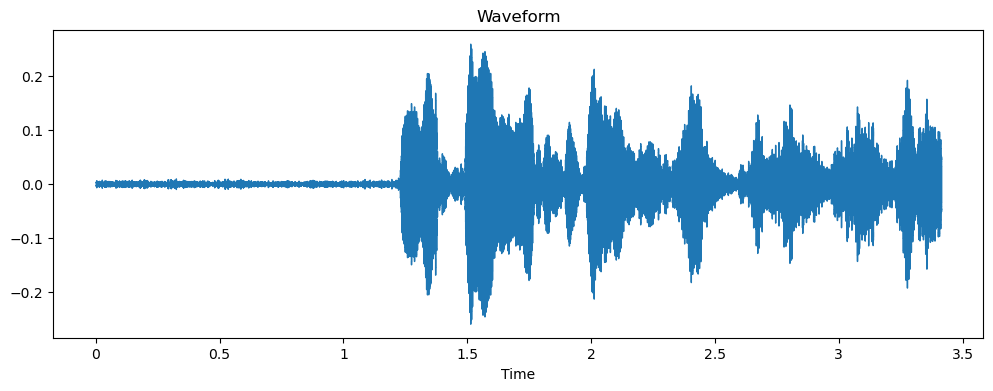

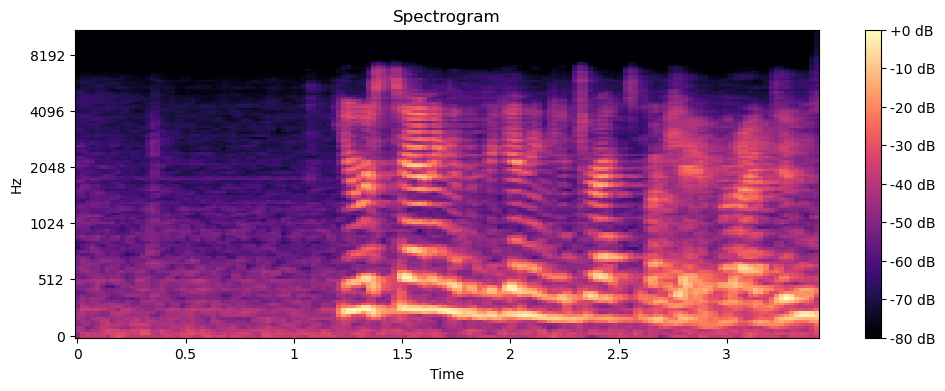

In [ ]:
#audio_path = 'D:\DS7010\IEMOCAP_full_release\IEMOCAP_full_release\session1\dialog\wav\Ses01F_impro01.wav'  # Replace with the path to your audio file
audio_path=path_finding_for_audio(data.wav_file[4],data.session[1])
# Load the audio file
audio, sr = librosa.load(audio_path)

# Plot the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title('Waveform')
plt.show()
spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.title('Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.show()


Boxplot

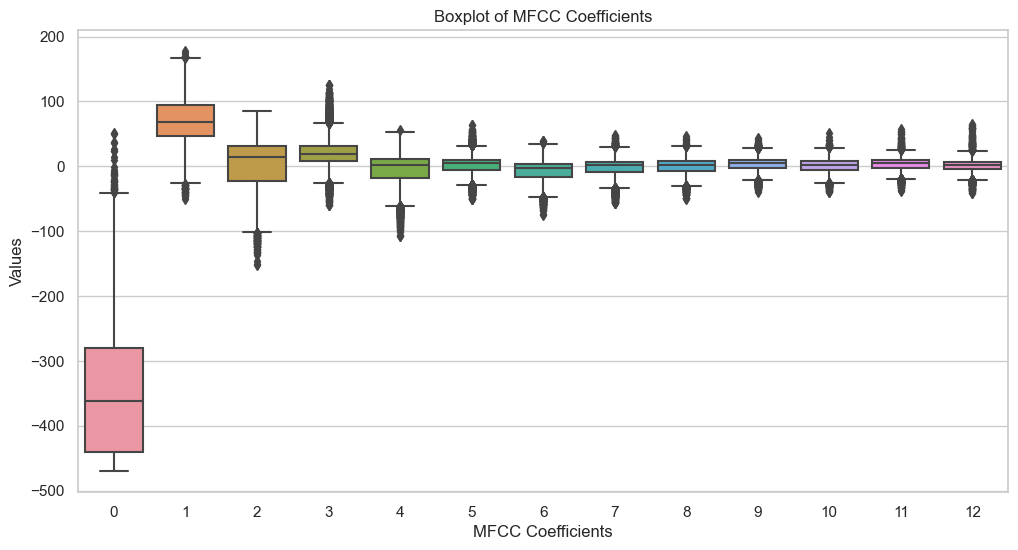

In [ ]:
audio_data, sample_rate = librosa.load(audio_path, sr=None)
mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=13)

# Transpose the MFCCs matrix to have features in columns
mfccs = mfccs.T

# Create a boxplot using seaborn
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
ax = sns.boxplot(data=mfccs)

# Set plot labels and title
ax.set(xlabel='MFCC Coefficients', ylabel='Values', title='Boxplot of MFCC Coefficients')

plt.show()

# MFCC

MFCC -- Audio Preprocessing

In [ ]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
#Keras
import keras

In [ ]:
#feature extraction
songname=path_finding_for_audio(data.wav_file[2],data.session[2])
y, sr = librosa.load(songname, mono=True, duration=30)
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
# Compute RMSE directly from the waveform
rmse = np.sqrt(np.mean(y ** 2))
#rmse = librosa.feature.rmse(y=y)
spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
zcr = librosa.feature.zero_crossing_rate(y)
mfcc = librosa.feature.mfcc(y=y, sr=sr)
# Now, you need to concatenate all these features into a single feature vector for each audio clip.
# Depending on your dataset, you may also need to normalize or scale these features.

# For example, if you have extracted features for multiple audio clips, you would stack them vertically to form a feature matrix.
#feature_matrix = np.vstack((chroma_stft, rmse, spec_cent, spec_bw, rolloff, zcr))
print(chroma_stft.shape)
print('/n')
print(spec_cent.shape)
print('/n')
print(spec_bw.shape)
print('/n')
print(rolloff.shape)
print('/n')
print(zcr.shape)
print('/n')
print(mfcc.shape)
# Then, you can use this feature matrix as input to your sentiment analysis model.
#feature_matrix


(12, 135)
/n
(1, 135)
/n
(1, 135)
/n
(1, 135)
/n
(1, 135)
/n
(20, 135)


In [ ]:
import numpy as np
import librosa
from tqdm import tqdm

# Example feature extraction function
def extract_features(y, sr):
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rmse = np.sqrt(np.mean(y ** 2))
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]
    zcr = librosa.feature.zero_crossing_rate(y)[0]
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    return chroma_stft, rmse, spec_cent, spec_bw, rolloff, zcr, mfcc

# Assuming you have a function `path_finding_for_audio()` that returns the file path
def path_finding_for_audio_local(wav_file, session):
    # Your code to find the file path
    file_path=path_finding_for_audio(wav_file,session)
    return file_path

# Initialize lists to store extracted features
all_chroma_stft = []
all_rmse = []
all_spec_cent = []
all_spec_bw = []
all_rolloff = []
all_zcr = []
all_mfcc = []
metadata=data
# Iterate over each row in the metadata and extract features
for index_num, row in tqdm(metadata.iterrows(), total=len(metadata)):
    # Find the file path for the audio
    file_path = path_finding_for_audio_local(row['wav_file'], row['session'])
    # Load audio signal and sampling rate
    y, sr = librosa.load(file_path, sr=None)
    # Extract features
    chroma_stft, rmse, spec_cent, spec_bw, rolloff, zcr, mfcc = extract_features(y, sr)
    # Pad or truncate feature vectors to match the maximum length
    #max_len = max(len(chroma_stft[0]), 1, len(spec_cent), len(spec_bw), len(rolloff), len(zcr), mfcc.shape[1])
    max_len=1472
    chroma_stft = np.pad(chroma_stft, ((0, 0), (0, max_len - len(chroma_stft[0]))), mode='constant')
    rmse = np.array([rmse])
    spec_cent = np.pad(spec_cent, (0, max_len - len(spec_cent)), mode='constant')
    spec_bw = np.pad(spec_bw, (0, max_len - len(spec_bw)), mode='constant')
    rolloff = np.pad(rolloff, (0, max_len - len(rolloff)), mode='constant')
    zcr = np.pad(zcr, (0, max_len - len(zcr)), mode='constant')
    mfcc = np.pad(mfcc, ((0, 0), (0, max_len - mfcc.shape[1])), mode='constant')
    # Append to lists
    all_chroma_stft.append(chroma_stft)
    all_rmse.append(rmse)
    all_spec_cent.append(spec_cent)
    all_spec_bw.append(spec_bw)
    all_rolloff.append(rolloff)
    all_zcr.append(zcr)
    all_mfcc.append(mfcc)

# Convert lists to numpy arrays
all_chroma_stft = np.array(all_chroma_stft)
all_rmse = np.array(all_rmse)
all_spec_cent = np.array(all_spec_cent)
all_spec_bw = np.array(all_spec_bw)
all_rolloff = np.array(all_rolloff)
all_zcr = np.array(all_zcr)
all_mfcc = np.array(all_mfcc)

# Now, you have arrays with consistent feature vector lengths that you can use for further processing.


100%|████████████████████████████████████████████████████████████████████████████| 10039/10039 [10:51<00:00, 15.41it/s]


In [ ]:
import numpy as np
import librosa
from tqdm import tqdm

# Example feature extraction function
def extract_features(y, sr):
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    rmse = np.sqrt(np.mean(y ** 2))
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]
    zcr = librosa.feature.zero_crossing_rate(y)[0]
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    return chroma_stft, rmse, spec_cent, spec_bw, rolloff, zcr, mfcc

# Assuming you have a function `path_finding_for_audio()` that returns the file path
def path_finding_for_audio_local(wav_file, session):
    # Your code to find the file path
    file_path=path_finding_for_audio(wav_file,session)
    return file_path

# Initialize lists to store extracted features
all_chroma_stft = []
all_rmse = []
all_spec_cent = []
all_spec_bw = []
all_rolloff = []
all_zcr = []
all_mfcc = []
metadata=data
extracted_features=[]
# Iterate over each row in the metadata and extract features
for index_num, row in tqdm(metadata.iterrows(), total=len(metadata)):
    # Find the file path for the audio
    file_path = path_finding_for_audio_local(row['wav_file'], row['session'])
    # Load audio signal and sampling rate
    y, sr = librosa.load(file_path, sr=None)
    # Extract features
    chroma_stft, rmse, spec_cent, spec_bw, rolloff, zcr, mfcc = extract_features(y, sr)
    # Pad or truncate feature vectors to match the maximum length
    #max_len = max(len(chroma_stft[0]), 1, len(spec_cent), len(spec_bw), len(rolloff), len(zcr), mfcc.shape[1])
    max_len=1472
    chroma_stft = np.pad(chroma_stft, ((0, 0), (0, max_len - len(chroma_stft[0]))), mode='constant')
    rmse = np.array([rmse])
    spec_cent = np.pad(spec_cent, (0, max_len - len(spec_cent)), mode='constant')
    spec_bw = np.pad(spec_bw, (0, max_len - len(spec_bw)), mode='constant')
    rolloff = np.pad(rolloff, (0, max_len - len(rolloff)), mode='constant')
    zcr = np.pad(zcr, (0, max_len - len(zcr)), mode='constant')
    mfcc = np.pad(mfcc, ((0, 0), (0, max_len - mfcc.shape[1])), mode='constant')
    # Append to lists
    final_class_Lables=row["emotion"]
    #datas = features_extractor(file_name)
    #extracted_features.append([datas] + final_class_labels)
    #extracted_features.append(datas, final_class_Lables)
    extracted_features.append([mfcc,chroma_stft,rmse,spec_cent,spec_bw,rolloff,zcr, final_class_Lables])

# Converting extracted_features to Pandas DataFrame
#extracted_features_df = pd.DataFrame(extracted_features, columns=['feature', 'emotion', 'activation', 'valence', 'dominance'])
extracted_features_df = pd.DataFrame(extracted_features, columns=['mfcc', 'chroma_stft','rmse','spec_cent','spec_bw','rolloff','zcr','emotion'])
extracted_features_df

# Now, you have arrays with consistent feature vector lengths that you can use for further processing.


100%|████████████████████████████████████████████████████████████████████████████| 10039/10039 [10:48<00:00, 15.47it/s]


,mfcc,chroma_stft,rmse,spec_cent,spec_bw,rolloff,zcr,emotion
0,"[[-424.00424, -399.91824, -413.64383, -424.244...","[[0.17543468, 0.2985349, 0.775909, 0.82166463,...",[0.012918286],"[1629.7462130273425, 1463.931956398568, 1307.1...","[1703.9224028724122, 1573.9181211843086, 1476....","[3617.1875, 3312.5, 2828.125, 2835.9375, 2757....","[0.04443359375, 0.0634765625, 0.083984375, 0.0...",neu
1,"[[-461.30258, -435.12332, -437.78238, -449.392...","[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",[0.017596507],"[1860.823454034211, 1731.7722738181515, 1592.8...","[1901.8425509720757, 1842.041588400827, 1751.3...","[4250.0, 4195.3125, 3968.75, 3718.75, 3554.687...","[0.0751953125, 0.09814453125, 0.12451171875, 0...",neu
2,"[[-514.6385, -482.86572, -484.7778, -487.64957...","[[0.7308443, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7...",[0.01381969],"[1047.5053195568717, 1066.0163758644057, 1103....","[1404.1382710616492, 1380.9132120933346, 1404....","[2195.3125, 2312.5, 2445.3125, 2507.8125, 2257...","[0.02978515625, 0.04150390625, 0.06201171875, ...",neu
3,"[[-442.9187, -421.0466, -422.7469, -426.67825,...","[[0.51123834, 0.18815216, 0.043226402, 0.05005...",[0.022907183],"[1237.65303790983, 1086.1420891885043, 1068.05...","[1542.1879292054073, 1382.420915517269, 1290.4...","[2492.1875, 2117.1875, 2031.25, 2125.0, 2367.1...","[0.0439453125, 0.072265625, 0.09521484375, 0.1...",neu
4,"[[-454.84988, -431.61584, -437.32144, -437.073...","[[1.0, 1.0, 1.0, 1.0, 1.0, 0.94345677, 0.82105...",[0.03816508],"[1587.6983121097082, 1501.2222843282289, 1466....","[1628.4878352796527, 1609.7245439027706, 1604....","[3453.125, 3359.375, 3398.4375, 3109.375, 3023...","[0.04150390625, 0.0634765625, 0.09228515625, 0...",neu
...,...,...,...,...,...,...,...,...
10034,"[[-464.61102, -449.78964, -451.77954, -452.272...","[[0.7592837, 0.6063576, 0.45435432, 0.448967, ...",[0.11164915],"[1215.4223146013976, 1088.5417508010846, 1045....","[1732.2626070461629, 1557.634686261143, 1437.3...","[2851.5625, 2476.5625, 2375.0, 2132.8125, 2046...","[0.02099609375, 0.025390625, 0.03369140625, 0....",ang
10035,"[[-286.41678, -254.09897, -253.39905, -267.787...","[[0.18014905, 0.094499804, 0.12382059, 0.07426...",[0.19238786],"[2551.9838487782217, 2738.1240319495196, 2729....","[1402.1232210392802, 1346.1696614958578, 1392....","[4187.5, 4257.8125, 4304.6875, 4289.0625, 4148...","[0.1689453125, 0.25146484375, 0.31884765625, 0...",ang
10036,"[[-305.78604, -159.6131, -44.133278, 0.9901227...","[[0.67320657, 0.48418412, 0.702004, 0.33183214...",[0.23306562],"[1310.2566399023558, 1594.3059472464622, 1732....","[1621.8577618234083, 1464.7336150219617, 1322....","[3507.8125, 3421.875, 3375.0, 3335.9375, 3328....","[0.046875, 0.08935546875, 0.1376953125, 0.1635...",ang
10037,"[[-63.621964, -36.41109, -36.024326, -51.43503...","[[0.2552061, 0.29922193, 0.78150374, 1.0, 1.0,...",[0.24243143],"[1889.4638572150093, 1863.547815797272, 1852.7...","[1323.7552595704328, 1318.6590472641242, 1297....","[3617.1875, 3625.0, 3609.375, 3625.0, 3507.812...","[0.09033203125, 0.12841796875, 0.173828125, 0....",ang


In [ ]:
extracted_features_df.mfcc[1].shape

(20, 1472)

In [ ]:
import resampy

In [ ]:
df=extracted_features_df

In [ ]:
#df = pd.DataFrame(extracted_features_df)
#df.info()
extracted_features_df.to_csv('D:\\DS7010\\IEMOCAP_full_release\\IEMOCAP_full_release\\extracted_features_df_all_features.csv',index=False)


In [ ]:
df=pd.read_csv('D:\\DS7010\\IEMOCAP_full_release\\IEMOCAP_full_release\\extracted_features_df_all_features.csv')
df.head()

,mfcc,chroma_stft,rmse,spec_cent,spec_bw,rolloff,zcr,emotion
0,[[-4.24004242e+02 -3.99918243e+02 -4.13643829e...,[[0.17543468 0.2985349 0.775909 ... 0. ...,[0.01291829],[1629.74621303 1463.9319564 1307.11540092 ......,[1703.92240287 1573.91812118 1476.96533953 ......,[3617.1875 3312.5 2828.125 ... 0. ...,[0.04443359 0.06347656 0.08398438 ... 0. ...,neu
1,[[-461.30258 -435.12332 -437.78238 .....,[[1. 1. 1. ... 0. ...,[0.01759651],[1860.82345403 1731.77227382 1592.80252645 ......,[1901.84255097 1842.0415884 1751.33041404 ......,[4250. 4195.3125 3968.75 ... 0. ...,[0.07519531 0.09814453 0.12451172 ... 0. ...,neu
2,[[-5.1463849e+02 -4.8286572e+02 -4.8477780e+02...,[[0.7308443 1. 1. ... 0. ...,[0.01381969],[1047.50531956 1066.01637586 1103.93270154 ......,[1404.13827106 1380.91321209 1404.29347079 ......,[2195.3125 2312.5 2445.3125 ... 0. ...,[0.02978516 0.04150391 0.06201172 ... 0. ...,neu
3,[[-4.4291870e+02 -4.2104660e+02 -4.2274689e+02...,[[0.51123834 0.18815216 0.0432264 ... 0. ...,[0.02290718],[1237.65303791 1086.14208919 1068.0538026 ......,[1542.18792921 1382.42091552 1290.46860793 ......,[2492.1875 2117.1875 2031.25 ... 0. ...,[0.04394531 0.07226562 0.09521484 ... 0. ...,neu
4,[[-4.5484988e+02 -4.3161584e+02 -4.3732144e+02...,[[1. 1. 1. ... 0. ...,[0.03816508],[1587.69831211 1501.22228433 1466.27913169 ......,[1628.48783528 1609.7245439 1604.09477266 ......,[3453.125 3359.375 3398.4375 ... 0. ...,[0.04150391 0.06347656 0.09228516 ... 0. ...,neu


Handling categorical data

Standardization for all remaining features

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
scale= StandardScaler()
extracted_features_df['activation'] = standardization(extracted_features_df['activation'])
extracted_features_df['valence'] = standardization(extracted_features_df['valence'])
extracted_features_df['dominance'] = standardization(extracted_features_df['dominance'])
extracted_features_df

,feature,emotion,activation,valence,dominance
0,"[[-5.977715, -5.856953, -5.8687615, -5.892653,...",neu,-0.840442,-0.309903,-0.879940
1,"[[-6.0673785, -6.028888, -6.017779, -6.0068135...",neu,-0.840442,-0.309903,-0.879940
2,"[[-6.0432563, -5.999077, -5.9894414, -6.004670...",neu,-0.840442,-0.309903,-0.879940
3,"[[-5.9482236, -5.8801813, -5.893124, -5.885771...",neu,-0.127901,-0.309903,-0.246275
4,"[[-6.05297, -6.009555, -6.0338902, -6.0275507,...",neu,-0.127901,-0.309903,-0.879940
...,...,...,...,...,...
10034,"[[-6.185677, -6.157368, -6.1619625, -6.174262,...",ang,2.009722,-1.981648,2.288386
10035,"[[-5.8414283, -5.703253, -5.6013927, -5.596718...",ang,2.009722,-1.981648,1.654721
10036,"[[-5.863098, -5.567462, -4.1888037, -2.2318316...",ang,1.297181,-1.424399,1.654721
10037,"[[-2.9798174, -2.233127, -2.1581755, -2.240352...",ang,2.722262,-1.981648,2.288386


Standardization Function

Training and Testing data splitting

In [ ]:
import visualkeras
import pydot
visualkeras.layered_view(model, legend=True) # without custom font
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# Model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.head()

,mfcc,chroma_stft,rmse,spec_cent,spec_bw,rolloff,zcr,emotion
0,"[[-424.00424, -399.91824, -413.64383, -424.244...","[[0.17543468, 0.2985349, 0.775909, 0.82166463,...",[0.012918286],"[1629.7462130273425, 1463.931956398568, 1307.1...","[1703.9224028724122, 1573.9181211843086, 1476....","[3617.1875, 3312.5, 2828.125, 2835.9375, 2757....","[0.04443359375, 0.0634765625, 0.083984375, 0.0...",neu
1,"[[-461.30258, -435.12332, -437.78238, -449.392...","[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",[0.017596507],"[1860.823454034211, 1731.7722738181515, 1592.8...","[1901.8425509720757, 1842.041588400827, 1751.3...","[4250.0, 4195.3125, 3968.75, 3718.75, 3554.687...","[0.0751953125, 0.09814453125, 0.12451171875, 0...",neu
2,"[[-514.6385, -482.86572, -484.7778, -487.64957...","[[0.7308443, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7...",[0.01381969],"[1047.5053195568717, 1066.0163758644057, 1103....","[1404.1382710616492, 1380.9132120933346, 1404....","[2195.3125, 2312.5, 2445.3125, 2507.8125, 2257...","[0.02978515625, 0.04150390625, 0.06201171875, ...",neu
3,"[[-442.9187, -421.0466, -422.7469, -426.67825,...","[[0.51123834, 0.18815216, 0.043226402, 0.05005...",[0.022907183],"[1237.65303790983, 1086.1420891885043, 1068.05...","[1542.1879292054073, 1382.420915517269, 1290.4...","[2492.1875, 2117.1875, 2031.25, 2125.0, 2367.1...","[0.0439453125, 0.072265625, 0.09521484375, 0.1...",neu
4,"[[-454.84988, -431.61584, -437.32144, -437.073...","[[1.0, 1.0, 1.0, 1.0, 1.0, 0.94345677, 0.82105...",[0.03816508],"[1587.6983121097082, 1501.2222843282289, 1466....","[1628.4878352796527, 1609.7245439027706, 1604....","[3453.125, 3359.375, 3398.4375, 3109.375, 3023...","[0.04150390625, 0.0634765625, 0.09228515625, 0...",neu


In [ ]:
import numpy as np
import librosa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

In [ ]:
le = LabelEncoder()
y=df['emotion']
Y = pd.get_dummies(y)

In [ ]:
Y.shape

(10039, 10)

In [ ]:
df.mfcc[1].shape

(20, 1472)

In [ ]:
model = Sequential()

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout, LSTM
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D
from keras.optimizers import SGD
import os


In [ ]:
#Convolution layers
model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(20, 1472,1)))
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
#Flattening
model.add(Flatten(input_shape=(20, 1472,1)))
#1st fully connected Neural Network hidden-layer
model.add(Dense(64))
model.add(Dropout(0.16))
model.add(Activation('relu'))
#2nd fully connected Neural Network hidden-layer
model.add(Dense(64))
model.add(Dropout(0.12))
model.add(Activation('relu'))
#Output layer
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 1470, 8)       80        
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 1468, 8)       584       
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 734, 8)         0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 8, 734, 8)         0         
                                                                 
 flatten (Flatten)           (None, 46976)             0         
                                                                 
 dense (Dense)               (None, 64)                3006528   
                                                       

In [ ]:
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy',
optimizer=sgd,
metrics=['accuracy'])

In [ ]:
X=df['mfcc']

In [ ]:
X.shape

(10039,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)


In [ ]:
x_train.shape

(7529,)

# New MFCCs

In [ ]:
!pip install python_speech_features

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5879 sha256=627b9365c55fdd35d70d4cc715de4d0a70b1edc8d0b2469d1fe6075296f4eac3
  Stored in directory: c:\users\nishc\appdata\local\pip\cache\wheels\37\01\19\e6c69a32684ab7b2e3ea4985a571d810cf055c72600e7f9f17
Successfully built python_speech_features


In [ ]:
from python_speech_features import mfcc
from python_speech_features import logfbank

In [ ]:
import numpy as np
import librosa
from tqdm import tqdm
data=[]
# Example feature extraction function
def extract_features(y, sr):
    size = 48
    X=[]
    for i in range(len(data)):
    mfcc_feat = mfcc(data[i],rate,nfft=512)
    mfcc_feat = np.resize(mfcc_feat, (size,13))
    Xmfcc.append(mfcc_feat)
    Xmfcc = np.array(X)

    return Xmfcc

# Assuming you have a function `path_finding_for_audio()` that returns the file path
def path_finding_for_audio_local(wav_file, session):
    # Your code to find the file path
    file_path=path_finding_for_audio(wav_file,session)
    return file_path

extracted_features=[]
# Iterate over each row in the metadata and extract features
for index_num, row in tqdm(metadata.iterrows(), total=len(metadata)):
    # Find the file path for the audio
    file_path = path_finding_for_audio_local(row['wav_file'], row['session'])
    # Load audio signal and sampling rate
    y, sr = librosa.load(file_path, sr=None)
    # Extract features
    data.append(y)
    mfcc = extract_features(y, sr)
    # Pad or truncate feature vectors to match the maximum length
    #max_len = max(len(chroma_stft[0]), 1, len(spec_cent), len(spec_bw), len(rolloff), len(zcr), mfcc.shape[1])

    final_class_Lables=row["emotion"]
    #datas = features_extractor(file_name)
    #extracted_features.append([datas] + final_class_labels)
    #extracted_features.append(datas, final_class_Lables)
    extracted_features.append([mfcc, final_class_Lables])

# Converting extracted_features to Pandas DataFrame
#extracted_features_df = pd.DataFrame(extracted_features, columns=['feature', 'emotion', 'activation', 'valence', 'dominance'])
extracted_features_dff = pd.DataFrame(extracted_features, columns=['mfcc','emotion'])
extracted_features_dff

# Now, you have arrays with consistent feature vector lengths that you can use for further processing.


  0%|                                                                                | 1/10039 [00:00<10:31, 15.90it/s]


TypeError: 'numpy.ndarray' object is not callable

In [ ]:
data=[]
def path_finding_for_audio_local(wav_file, session):
    # Your code to find the file path
    file_path=path_finding_for_audio(wav_file,session)
    return file_path

extracted_features=[]
# Iterate over each row in the metadata and extract features
for index_num, row in tqdm(metadata.iterrows(), total=len(metadata)):
    # Find the file path for the audio
    file_path = path_finding_for_audio_local(row['wav_file'], row['session'])
    # Load audio signal and sampling rate
    y, sr = librosa.load(file_path, sr=None)
    #print(sr)

    # Extract features
    data.append(y)

100%|███████████████████████████████████████████████████████████████████████████| 10039/10039 [00:14<00:00, 692.07it/s]


In [ ]:
data

[[array([-0.0050354 , -0.00497437, -0.0038147 , ..., -0.00265503,
         -0.00317383, -0.00418091], dtype=float32),
  'neu'],
 [array([ 0.00094604, -0.00094604, -0.0007019 , ..., -0.00045776,
         -0.00033569, -0.00128174], dtype=float32),
  'neu'],
 [array([-0.00036621, -0.00015259,  0.00042725, ..., -0.00030518,
         -0.00018311,  0.00088501], dtype=float32),
  'neu'],
 [array([-0.00488281, -0.00466919, -0.00527954, ..., -0.0007019 ,
         -0.00039673, -0.00021362], dtype=float32),
  'neu'],
 [array([0.00146484, 0.00167847, 0.00308228, ..., 0.01208496, 0.02059937,
         0.02474976], dtype=float32),
  'neu'],
 [array([-0.00085449, -0.00125122, -0.00167847, ...,  0.00238037,
          0.00274658,  0.00234985], dtype=float32),
  'neu'],
 [array([ 0.00610352,  0.0078125 ,  0.00875854, ..., -0.00228882,
          0.00271606,  0.01626587], dtype=float32),
  'fru'],
 [array([-0.02133179, -0.01107788, -0.00415039, ..., -0.00317383,
         -0.00494385, -0.00592041], dtype=fl

In [ ]:
from tqdm import tqdm
#from scipy.signal import mfcc
Xmfcc = []

for i in tqdm(range(len(data))):
    mfcc_features = librosa.feature.mfcc(y=data[i], sr=16000)
    #mfcc_features = mfcc(data[i], 16000, nfft=512)
    mfcc_resized = np.resize(mfcc_features, (size, 13))
    Xmfcc.append(mfcc_resized)

Xmfccs = np.array(Xmfcc)


100%|████████████████████████████████████████████████████████████████████████████| 10039/10039 [02:34<00:00, 64.98it/s]


In [ ]:
Xmfccs.shape

(10039, 48, 13)

In [ ]:
metadata=pd.read_csv('iemocap_final.csv')
metadata.head()

,_id,activation,valence,dominance,emotion,start_time,end_time,wav_file,session,sentences
0,625699ea1da7a5c1eaef6e63,2.5,2.5,2.5,neu,6.2901,8.2357,Ses01F_impro01_F000,1,Excuse me.
1,625699ea1da7a5c1eaef6e65,2.5,2.5,2.5,neu,10.0100,11.3925,Ses01F_impro01_F001,1,Yeah.
2,625699ea1da7a5c1eaef6e67,2.5,2.5,2.5,neu,14.8872,18.0175,Ses01F_impro01_F002,1,Is there a problem?
3,625699ea1da7a5c1eaef6e69,3.0,2.5,3.0,neu,19.2900,20.7875,Ses01F_impro01_F003,1,You did.
4,625699ea1da7a5c1eaef6e6a,3.0,2.5,2.5,neu,21.3257,24.7400,Ses01F_impro01_F004,1,You were standing at the beginning and you di...


In [ ]:
y=metadata['emotion']
Y = pd.get_dummies(y)

In [ ]:
Y

,ang,dis,exc,fea,fru,hap,neu,oth,sad,sur
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
10034,1,0,0,0,0,0,0,0,0,0
10035,1,0,0,0,0,0,0,0,0,0
10036,1,0,0,0,0,0,0,0,0,0
10037,1,0,0,0,0,0,0,0,0,0


In [ ]:
Y = np.array(Y)

In [ ]:
Y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
model = Sequential()
#Convolution layers
model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(48, 13,1)))
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))
#Flattening
model.add(Flatten(input_shape=(48, 13,1)))
#1st fully connected Neural Network hidden-layer
model.add(Dense(64))
model.add(Dropout(0.16))
model.add(Activation('relu'))
#2nd fully connected Neural Network hidden-layer
model.add(Dense(64))
model.add(Dropout(0.12))
model.add(Activation('relu'))
#Output layer
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 46, 11, 8)         80        
                                                                 
 conv2d_3 (Conv2D)           (None, 44, 9, 8)          584       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 22, 4, 8)          0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 22, 4, 8)          0         
                                                                 
 flatten_1 (Flatten)         (None, 704)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                45120     
                                                      

In [ ]:
sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy',
optimizer=sgd,
metrics=['accuracy'])

In [ ]:
X=Xmfccs

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
x_train = x_train.reshape(-1, size, 13, 1)
x_test = x_test.reshape(-1, size, 13, 1)

In [ ]:
history = model.fit(
x_train,
y_train,
epochs=18,
batch_size=32,
validation_split=0.2,
shuffle=True
)

Epoch 1/18



189/189 [==============================] - 3s 9ms/step - loss: 0.4449 - accuracy: 0.2564 - val_loss: 0.2793 - val_accuracy: 0.2835
Epoch 2/18
189/189 [==============================] - 1s 7ms/step - loss: 0.2824 - accuracy: 0.2726 - val_loss: 0.2728 - val_accuracy: 0.2935
Epoch 3/18
189/189 [==============================] - 2s 8ms/step - loss: 0.2778 - accuracy: 0.2811 - val_loss: 0.2724 - val_accuracy: 0.2948
Epoch 4/18
189/189 [==============================] - 1s 7ms/step - loss: 0.2763 - accuracy: 0.2789 - val_loss: 0.2728 - val_accuracy: 0.2981
Epoch 5/18
189/189 [==============================] - 2s 8ms/step - loss: 0.2746 - accuracy: 0.2856 - val_loss: 0.2707 - val_accuracy: 0.2935
Epoch 6/18
189/189 [==============================] - 1s 8ms/step - loss: 0.2735 - accuracy: 0.2861 - val_loss: 0.2710 - val_accuracy: 0.2855
Epoch 7/18
189/189 [==============================] - 1s 7ms/step - loss: 0.2732 - accuracy: 0.2876 - val_loss: 0.2717 - val_accuracy: 0.2948
Epoch 8/18
189/18

In [ ]:
model.evaluate(x_test, y_test, verbose=2)

79/79 - 0s - loss: 0.2641 - accuracy: 0.2884 - 188ms/epoch - 2ms/step


[0.2640700042247772, 0.28844621777534485]